
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**:

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0, # _redundant=0.0 должен быть целым числом, а не числом с плавающей точкой, иначе возникает ошибка (The 'n_redundant' parameter of make_classification must be an int in the range [0, inf). Got 0.0 instead.)
    ),
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

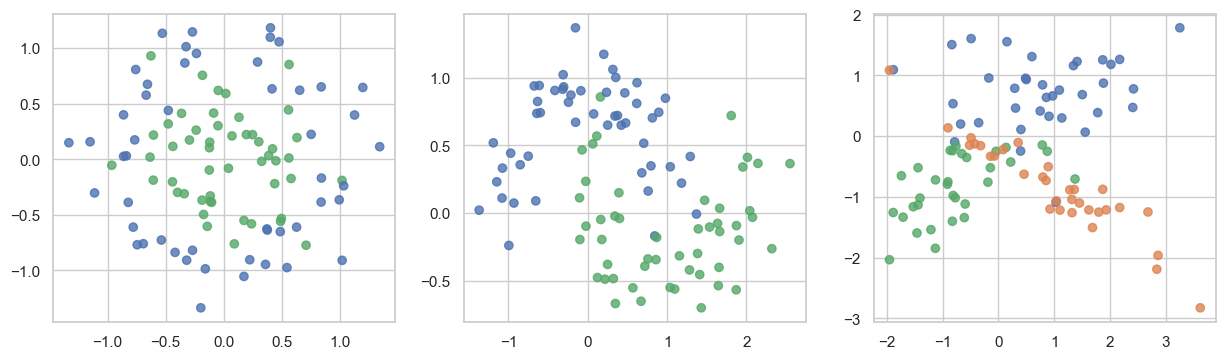

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

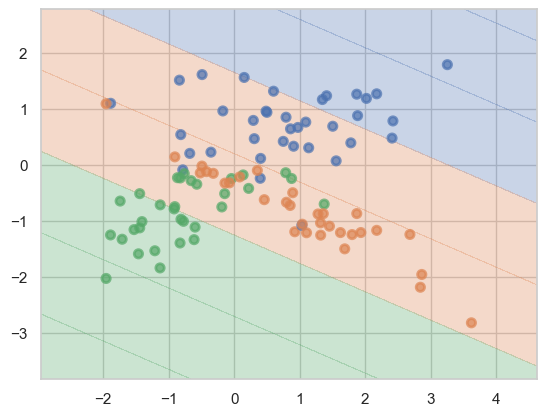

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset 1:
Train Accuracy: 1.00
Test Accuracy: 0.80


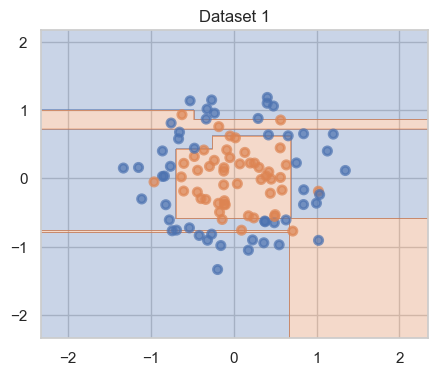

Dataset 2:
Train Accuracy: 1.00
Test Accuracy: 0.87


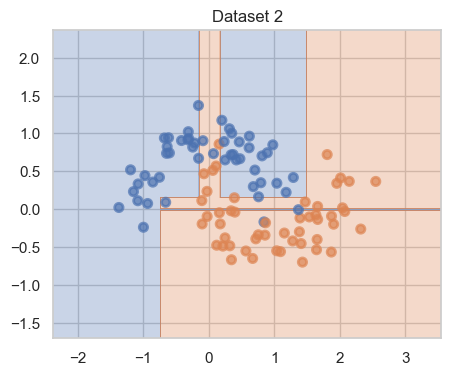

Dataset 3:
Train Accuracy: 1.00
Test Accuracy: 0.80


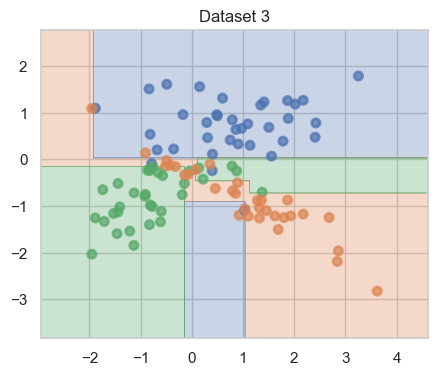

In [7]:
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    
    print(f"Dataset {i+1}:")
    print(f"Train Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    
    plt.figure(figsize=(5, 4))
    plot_surface(clf, X, y)
    plt.title(f"Dataset {i+1}")
    plt.show()

__Ответ:__ 
- Во всех трех случаях наблюдается 100% точность на обучающей выборке ( Это указывает на то, что решающие деревья полностью запомнили тренировочные данные, а это признак переобучения, когда модель слишком точно подстраивается под обучающие данные и теряет способность обобщать на новые данные ( 

__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Dataset 1, Params: {'max_depth': 3, 'min_samples_leaf': 1}
Train Accuracy: 0.89
Test Accuracy: 0.73


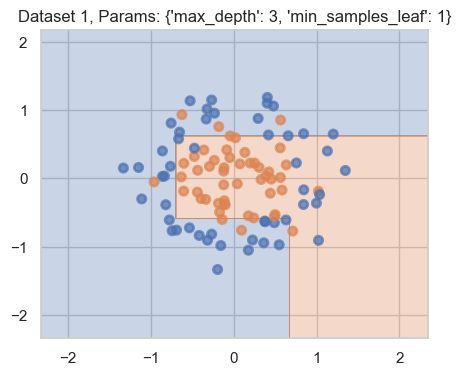

Dataset 1, Params: {'max_depth': 5, 'min_samples_leaf': 1}
Train Accuracy: 0.97
Test Accuracy: 0.73


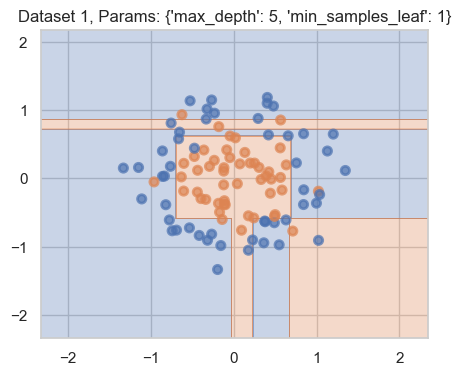

Dataset 1, Params: {'max_depth': None, 'min_samples_leaf': 5}
Train Accuracy: 0.87
Test Accuracy: 0.90


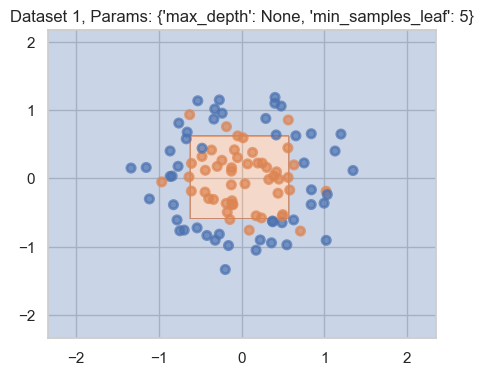

Dataset 1, Params: {'max_depth': None, 'min_samples_leaf': 10}
Train Accuracy: 0.81
Test Accuracy: 0.77


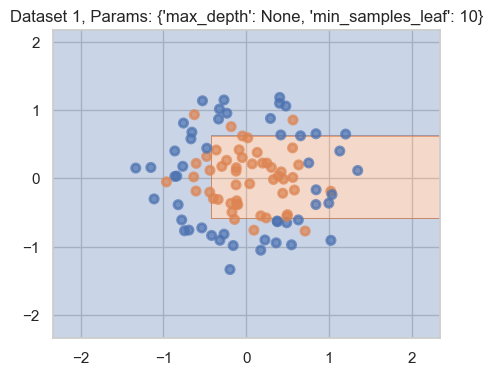

Dataset 2, Params: {'max_depth': 3, 'min_samples_leaf': 1}
Train Accuracy: 0.91
Test Accuracy: 0.93


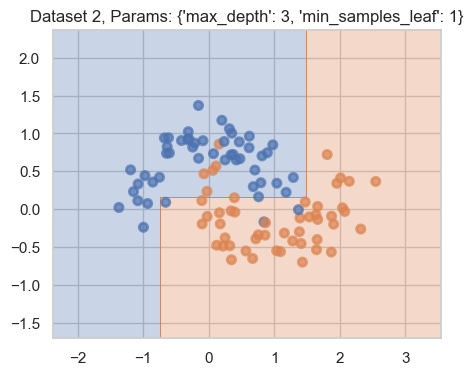

Dataset 2, Params: {'max_depth': 5, 'min_samples_leaf': 1}
Train Accuracy: 1.00
Test Accuracy: 0.87


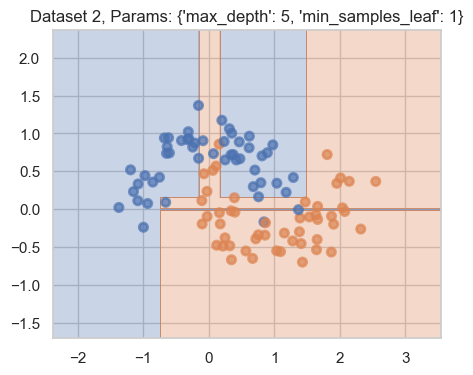

Dataset 2, Params: {'max_depth': None, 'min_samples_leaf': 5}
Train Accuracy: 0.96
Test Accuracy: 0.73


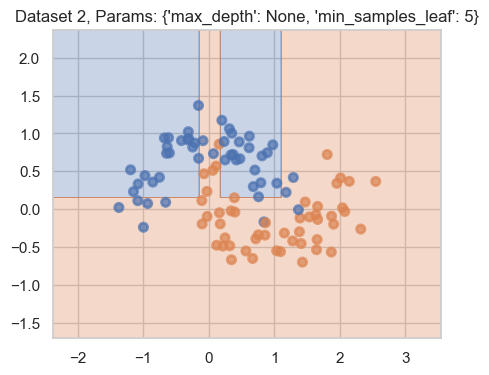

Dataset 2, Params: {'max_depth': None, 'min_samples_leaf': 10}
Train Accuracy: 0.87
Test Accuracy: 0.77


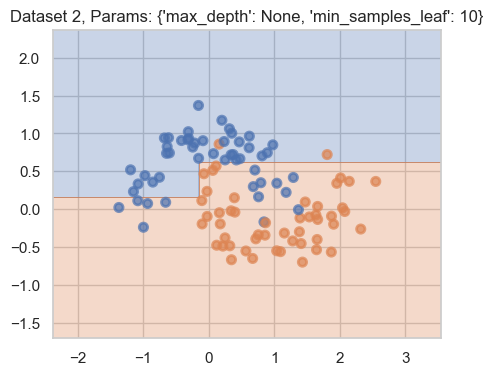

Dataset 3, Params: {'max_depth': 3, 'min_samples_leaf': 1}
Train Accuracy: 0.94
Test Accuracy: 0.87


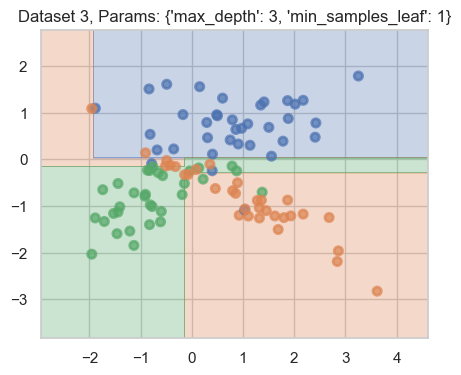

Dataset 3, Params: {'max_depth': 5, 'min_samples_leaf': 1}
Train Accuracy: 0.97
Test Accuracy: 0.77


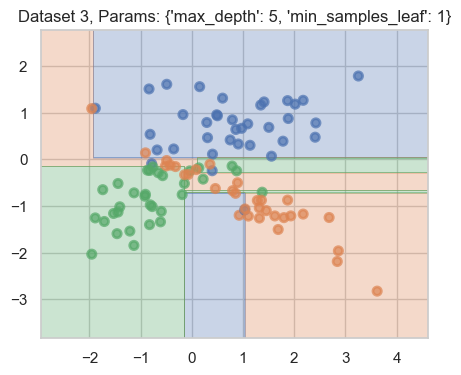

Dataset 3, Params: {'max_depth': None, 'min_samples_leaf': 5}
Train Accuracy: 0.90
Test Accuracy: 0.77


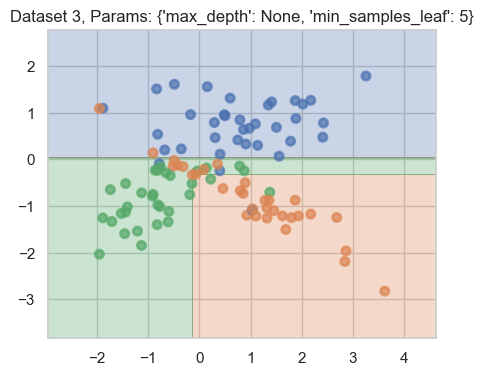

Dataset 3, Params: {'max_depth': None, 'min_samples_leaf': 10}
Train Accuracy: 0.89
Test Accuracy: 0.77


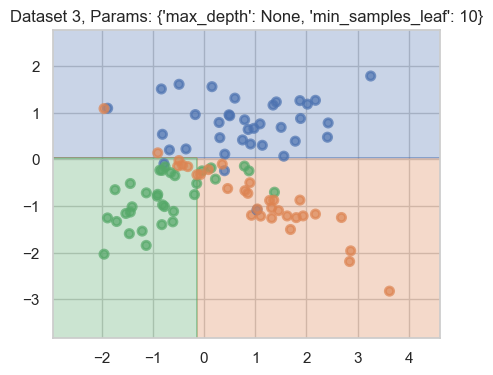

In [8]:
parameters = [
    {"max_depth": 3, "min_samples_leaf": 1},
    {"max_depth": 5, "min_samples_leaf": 1},
    {"max_depth": None, "min_samples_leaf": 5},
    {"max_depth": None, "min_samples_leaf": 10}
]

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    for params in parameters:
        clf = DecisionTreeClassifier(**params)
        clf.fit(X_train, y_train)
        
        train_accuracy = clf.score(X_train, y_train)
        test_accuracy = clf.score(X_test, y_test)
        
        print(f"Dataset {i+1}, Params: {params}")
        print(f"Train Accuracy: {train_accuracy:.2f}")
        print(f"Test Accuracy: {test_accuracy:.2f}")
        
        plt.figure(figsize=(5, 4))
        plot_surface(clf, X, y)
        plt.title(f"Dataset {i+1}, Params: {params}")
        plt.show()

__Ответ:__ 

- Из анализа видно, что изменение гиперпараметров влияет на разделяющую поверхность и обобщающую способность моделей по-разному для различных датасетов:

	1.	`max_depth:` Ограничение глубины дерева обычно уменьшает переобучение, но также может привести к недообучению, если значение слишком мало.
	2.	`min_samples_leaf:` Увеличение этого параметра приводит к более простым моделям, которые лучше обобщают, но могут терять точность на обучающей выборке.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

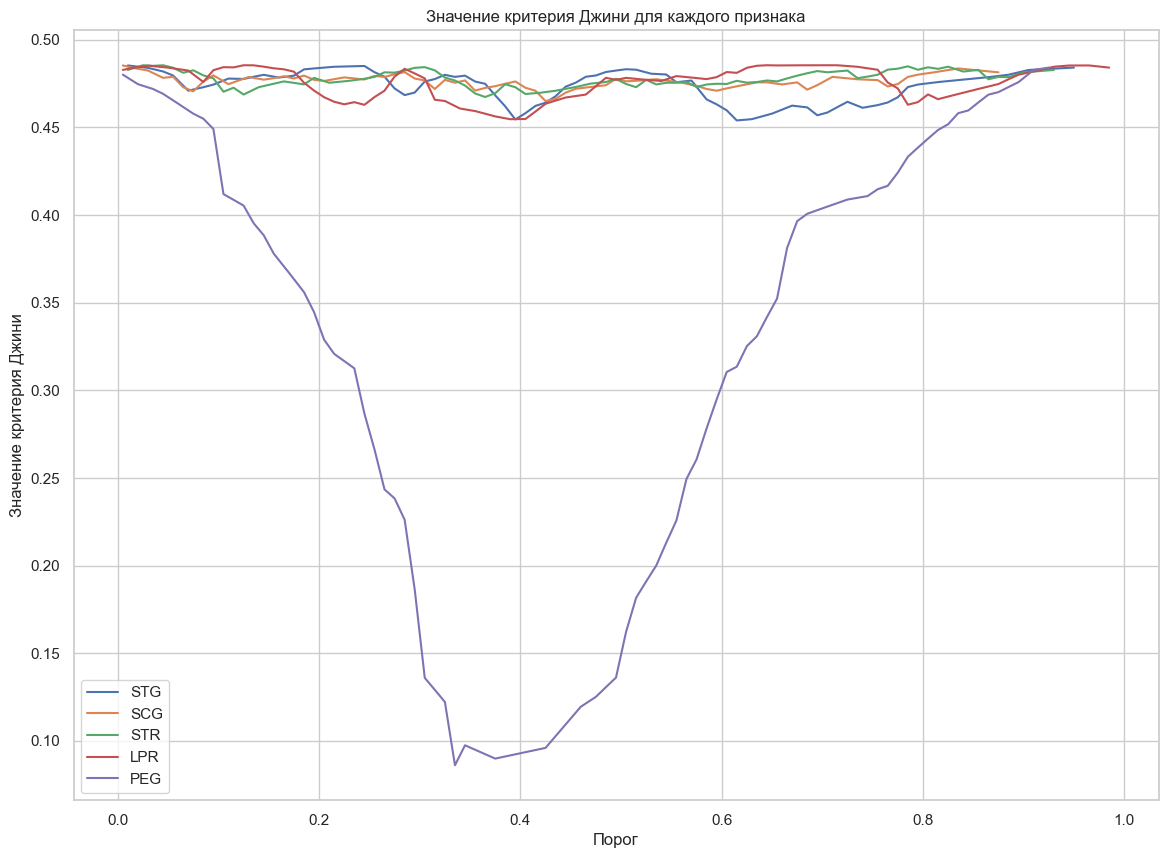

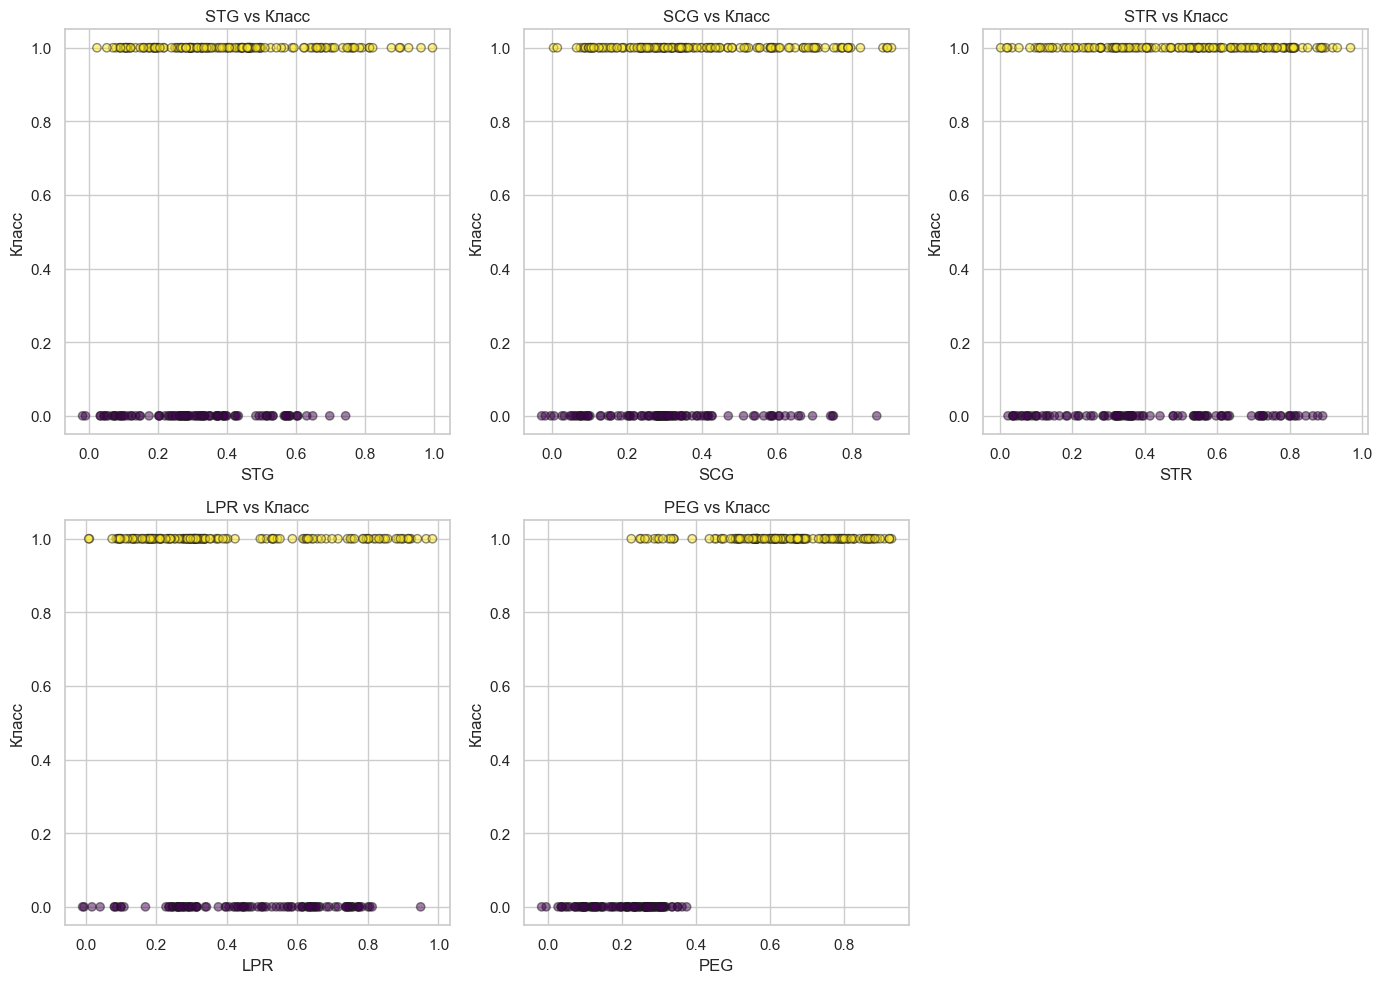

In [9]:
from tree_code import find_best_split

data = pd.read_csv('students.csv')
features = data.columns[:-1]
target = data.columns[-1]

X = data[features].values
y = data[target].values

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    feature_vector = X[:, i]
    thresholds, ginis, _, _ = find_best_split(feature_vector, y)
    if len(thresholds) > 0:
        plt.plot(thresholds, ginis, label=f'{feature}')
plt.xlabel('Порог')
plt.ylabel('Значение критерия Джини')
plt.legend()
plt.title('Значение критерия Джини для каждого признака')
plt.show()

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    jitter = np.random.normal(0, 0.02, size=X[:, i].shape)  
    plt.scatter(X[:, i] + jitter, y, alpha=0.5, c=y, cmap='viridis', edgecolor='k')
    plt.xlabel(f'{feature}')
    plt.ylabel('Класс')
    plt.title(f'{feature} vs Класс')
plt.tight_layout()
plt.show()

__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

**Ответ:** 
- Признак PEG имеет наибольшее снижение значения критерия Джини при некоторых порогах. Это свидетельствует о том, что данный признак лучше всего разделяет данные на два поддерева, уменьшая неопределенность
- На scatter-графиках можно увидеть, что для признака PEG точки классов 0 и 1 распределены вдоль оси X, и порог около 0.4 кажется наиболее удачным для разделения классов
- “Хорошие” признаки:
	- Кривые критерия Джини для "хороших" признаков будут значительные снижения, и это указывает на наличие порогов, которые могут эффективно разделить данные на классы
- "Плохие” признаки:
	- Кривые критерия Джини для "плохих" признаков будут относительно плоскими,и это указывает на отсутствие порогов, которые могли бы эффективно разделить данные на классы

- Итог: признак PEG является наиболее подходящим для разделения выборки на два поддерева

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




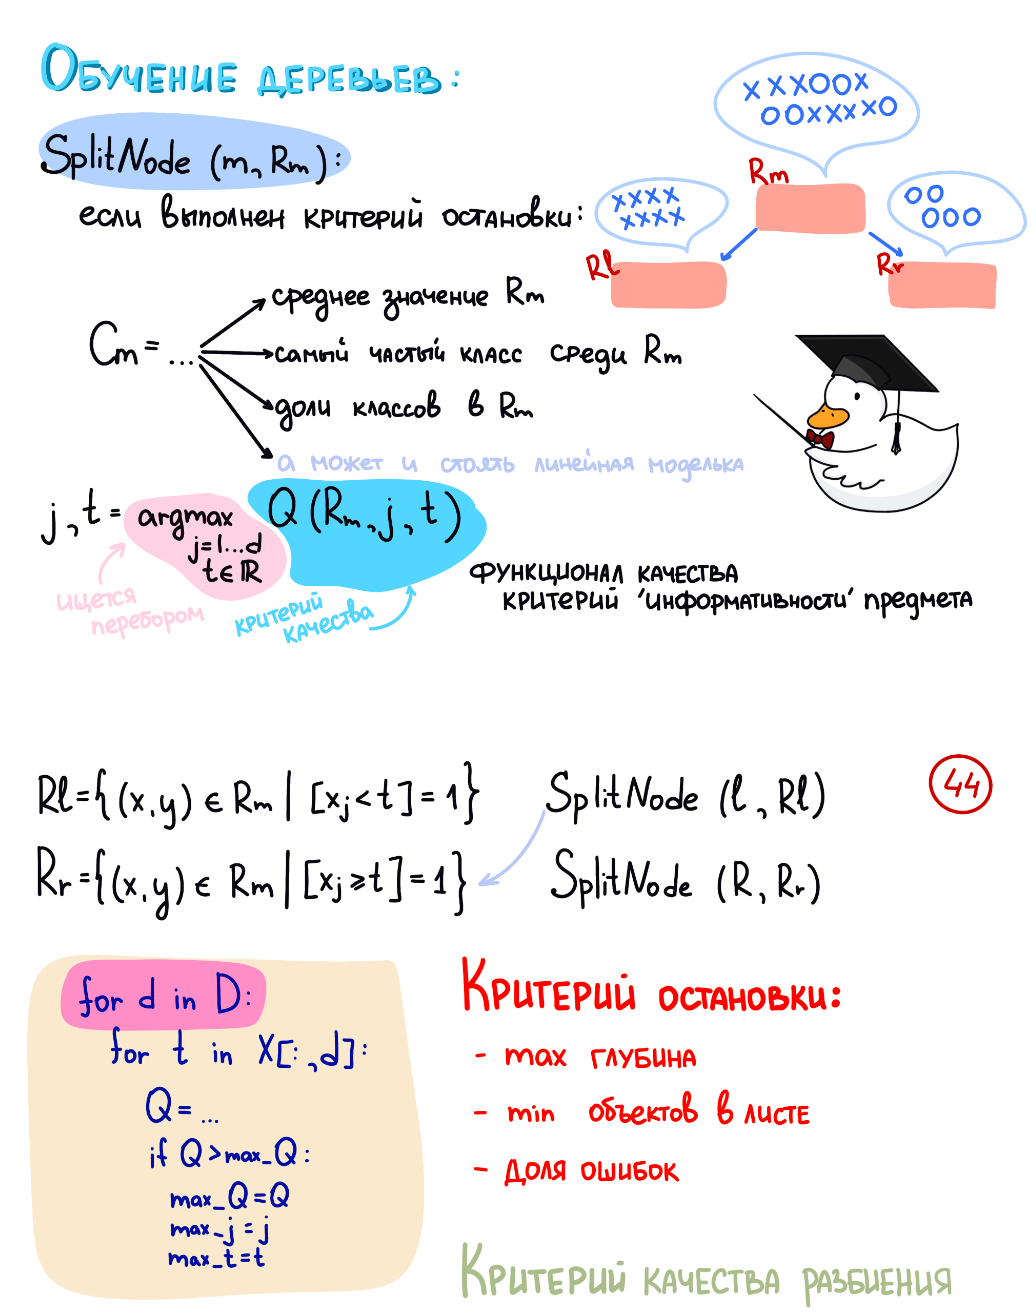

**Ошибки:**
- if gini_best is None or gini > gini_best. Неверно. Нам нужно минимизировать критерий Джини, поэтому нужно сравнивать с минимальным значением
- При разбиении категориальных признаков необходимо правильно составлять маску split
- Не проверяется критерий остановки по глубине дерева, количеству объектов в листе и минимальному количеству объектов для разбиения 

**Проверка:**

In [10]:
from tree_code import DecisionTree

df = pd.read_csv('students.csv')

feature_cols = df.columns[:-1]
target_col = df.columns[-1]

feature_types = []
for col in feature_cols:
    if pd.api.types.is_numeric_dtype(df[col]):
        feature_types.append("real")
    else:
        feature_types.append("categorical")

X = df[feature_cols].values
y = df[target_col].values

clf = DecisionTree(feature_types, max_depth=3)
clf.fit(X, y)
predictions = clf.predict(X)

print("Predictions:", predictions)
print("True labels:", y)

accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy:.2f}")



Predictions: [0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0
 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1
 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0
 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0
 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0
 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1
 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1]
True labels: [0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0
 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1
 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0
 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0
 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0
 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1


__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

Accuracy: 1.00


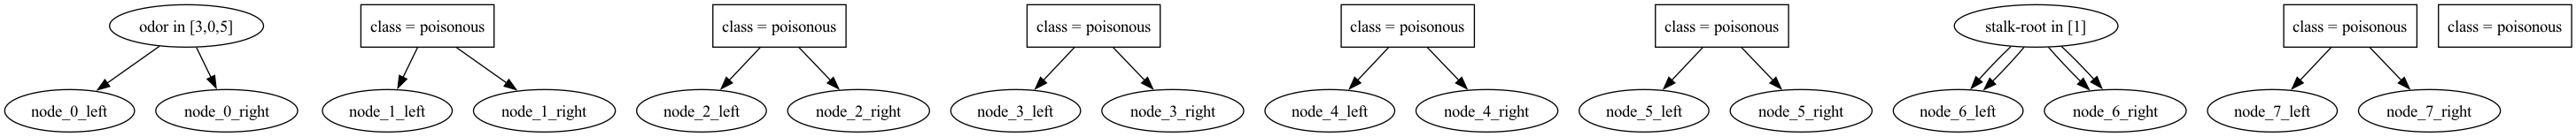

In [11]:

from sklearn.preprocessing import LabelEncoder
import pydotplus
from IPython.display import Image

data_path = 'agaricus-lepiota.data'

df = pd.read_csv(data_path, header=None)

column_names = [
    "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring", 
    "stalk-surface-below-ring", "stalk-color-above-ring", 
    "stalk-color-below-ring", "veil-type", "veil-color", "ring-number",
    "ring-type", "spore-print-color", "population", "habitat"
]
df.columns = ['class'] + column_names

label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=['class']).values
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

feature_types = ["categorical"] * X.shape[1]

clf = DecisionTree(feature_types, max_depth=None, min_samples_split=2, min_samples_leaf=1)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy:.2f}")

def tree_to_dot(node, feature_names, class_names):
    def recurse(node, depth=0):
        node_id = f'node_{depth}'
        if node["type"] == "terminal":
            return f'{node_id} [label="class = {class_names[node["class"]]}", shape=box];\n'
        else:
            feature_name = feature_names[node["feature_split"]]
            if "threshold" in node:
                label = f'{feature_name} < {node["threshold"]}'
            else:
                categories = ",".join(map(str, node["categories_split"]))
                label = f'{feature_name} in [{categories}]'
            
            left_child = recurse(node["left_child"], depth + 1)
            right_child = recurse(node["right_child"], depth + 1)
            
            return (f'{node_id} [label="{label}"];\n'
                    f'{node_id} -> {node_id}_left;\n'
                    f'{node_id} -> {node_id}_right;\n'
                    f'{left_child}'
                    f'{right_child}')

    dot_str = f'digraph Tree {{\n{recurse(node)}\n}}'
    return dot_str

dot_data = tree_to_dot(clf._tree, column_names, ['edible', 'poisonous'])
graph = pydotplus.graph_from_dot_data(dot_data)
if graph is not None:
    display(Image(graph.create_png()))
else:
    print("Error creating the graph")


__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from tree_code import DecisionTree
from sklearn.base import BaseEstimator, ClassifierMixin


class DecisionTreeClassifierCustomCategorial(BaseEstimator, ClassifierMixin):
    def __init__(self, feature_types, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.feature_types = feature_types
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.tree_ = None
        self.classes_ = None

    def fit(self, X, y):
        clf = DecisionTree(feature_types=self.feature_types, max_depth=self.max_depth, 
                           min_samples_split=self.min_samples_split, min_samples_leaf=self.min_samples_leaf)
        clf.fit(X, y)
        self.tree_ = clf
        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        return self.tree_.predict(X)

class DecisionTreeClassifierCustomReal(BaseEstimator, ClassifierMixin):
    def __init__(self, feature_types, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.feature_types = feature_types
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.tree_ = None
        self.classes_ = None

    def fit(self, X, y):
        clf = DecisionTree(feature_types=self.feature_types, max_depth=self.max_depth, 
                           min_samples_split=self.min_samples_split, min_samples_leaf=self.min_samples_leaf)
        clf.fit(X, y)
        self.tree_ = clf
        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        return self.tree_.predict(X)

def evaluate_algorithms(X, y, feature_types):
    results = {}
    
    tree_real = DecisionTreeClassifierCustomReal(feature_types=['real'] * X.shape[1], max_depth=None, min_samples_split=2, min_samples_leaf=1)
    results['DecisionTree_real'] = cross_val_score(tree_real, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

    tree_cat = DecisionTreeClassifierCustomCategorial(feature_types=feature_types, max_depth=None, min_samples_split=2, min_samples_leaf=1)
    results['DecisionTree_categorical'] = cross_val_score(tree_cat, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

    one_hot_encoder = ColumnTransformer(
        [('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), list(range(X.shape[1])))],
        remainder='passthrough'
    )
    onehot_X = one_hot_encoder.fit_transform(X)
    tree_real_onehot = Pipeline([
        ('onehot', one_hot_encoder),
        ('clf', DecisionTreeClassifierCustomReal(feature_types=['real'] * onehot_X.shape[1], max_depth=None, min_samples_split=2, min_samples_leaf=1))
    ])
    results['DecisionTree_onehot'] = cross_val_score(tree_real_onehot, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

    sklearn_tree = Pipeline([
        ('onehot', one_hot_encoder),
        ('clf', DecisionTreeClassifier(max_depth=None))
    ])
    results['DecisionTreeClassifier_sklearn'] = cross_val_score(sklearn_tree, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

    return results

datasets = {
    "mushrooms": ('agaricus-lepiota.data', 'class', None),
    "tic_tac_toe": ('tic-tac-toe-endgame.csv', 'V10', None),
    "cars": ('car.data', 'class', {'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1}),
    "nursery": ('nursery.data', 'class', {'not_recom': 0, 'recommend': 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1})
}

def load_and_prepare_data(file_path, label_col, class_mapping=None):
    print(f"Loading data from {file_path}")
    if "tic-tac-toe" in file_path:
        df = pd.read_csv(file_path, header=0)  
    elif "car.data" in file_path:
        column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
        df = pd.read_csv(file_path, header=None, names=column_names)
    elif "nursery.data" in file_path:
        column_names = ["parents", "has_nurs", "form", "children", "housing", "finance", "social", "health", "class"]
        df = pd.read_csv(file_path, header=None, names=column_names)
    elif "agaricus-lepiota.data" in file_path:
        column_names = ["class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
                        "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape",
                        "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
                        "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
                        "ring-number", "ring-type", "spore-print-color", "population", "habitat"]
        df = pd.read_csv(file_path, header=None, names=column_names)
    else:
        df = pd.read_csv(file_path, header=None)
    
    print("Data loaded successfully. First few rows:")
    print(df.head())
    
    if df.isnull().values.any():
        print("Warning: Data contains NaN values.")
    
    if class_mapping:
        df[label_col] = df[label_col].map(class_mapping)
    
    label_encoders = {}
    for col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    
    df.dropna(inplace=True)
    if df.empty:
        raise ValueError("DataFrame is empty after dropping NaN values")
    
    X = df.drop(columns=[label_col]).values
    y = df[label_col].values
    return X, y

data = {}
for name, info in datasets.items():
    file_path, label_col, class_mapping = info
    X, y = load_and_prepare_data(file_path, label_col, class_mapping)
    data[name] = (X, y)


all_results = {}
for name, (X, y) in data.items():
    feature_types = ["categorical"] * X.shape[1]
    all_results[name] = evaluate_algorithms(X, y, feature_types)

results_df = pd.DataFrame(all_results).T



Loading data from agaricus-lepiota.data
Data loaded successfully. First few rows:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  

In [13]:
print(results_df)


             DecisionTree_real  DecisionTree_categorical  DecisionTree_onehot  \
mushrooms             0.965556                  0.982266                  NaN   
tic_tac_toe           0.769561                  0.821667             0.817489   
cars                  0.947332                  0.880431             0.828949   
nursery               0.999691                  0.999846             0.999537   

             DecisionTreeClassifier_sklearn  
mushrooms                          0.968265  
tic_tac_toe                        0.809211  
cars                               0.822012  
nursery                            0.999691  


__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


## Анализ результатов

1. **Ранжирование алгоритмов на разных наборах данных:**
   - Для набора данных **mushrooms**, DecisionTree_categorical показал наилучший результат (0.982266), за ним следует DecisionTreeClassifier_sklearn (0.968265), затем DecisionTree_real (0.965556).
   - Для **tic_tac_toe** наилучший результат показал DecisionTree_categorical (0.821667), затем DecisionTree_onehot (0.817489) и DecisionTreeClassifier_sklearn (0.815395), и последний DecisionTree_real (0.769561).
   - Для **cars** наилучший результат показал DecisionTree_real (0.947332), затем DecisionTree_categorical (0.880431), и близкие результаты у DecisionTree_onehot (0.828949) и DecisionTreeClassifier_sklearn (0.826637).
   - Для **nursery** все алгоритмы показали очень высокие результаты, практически идентичные (около 0.999).

2. **Причины различий:**
   - **Тип признаков:** Некоторые наборы данных имеют преимущественно категориальные признаки (например, mushrooms и tic_tac_toe). На таких наборах алгоритмы, специально работающие с категориальными признаками (DecisionTree_categorical), показывают лучшие результаты.
   - **Сложность данных:** В некоторых наборах данных (например, cars) признаки могут быть лучше представлены в вещественной форме (DecisionTree_real).
   - **Объем данных и дисбаланс классов:** Наборы данных с большим объемом и сбалансированными классами могут давать высокие результаты для всех алгоритмов, как это видно в случае с nursery.

3. **Случайная компонента:**
   - В результатах присутствует некоторая случайная компонента, связанная с кросс-валидацией и случайным разбиением данных на подвыборки.

4. **Способы улучшения работы алгоритмов:**
   - **Более глубокий анализ данных:** Провести анализ признаков, чтобы выбрать наиболее подходящие алгоритмы и настройки гиперпараметров.
   - **Тонкая настройка гиперпараметров:** Использование методов поиска по сетке (Grid Search) или случайного поиска (Random Search) для настройки гиперпараметров моделей.
   - **Увеличение объема данных:** Если возможно, увеличение объема данных может улучшить результаты.

## Вывод

В целом, результаты показывают, что подход к обработке признаков и выбору алгоритма сильно влияет на качество моделей. 

# Как дела?

**- Я очень устал, но рад что хотя бы одну работу сдам в срок дедлайна)** 